In [86]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import models
from keras import layers
from keras import optimizers
import keras
import keras.utils as image

In [3]:
import zipfile
with zipfile.ZipFile("archive (5).zip", 'r') as zip_ref:
    zip_ref.extractall()

In [132]:
img_size = 64
batch_size= 32

train_datagen = ImageDataGenerator(rescale=1/255., validation_split = 0.05)

test_datagen = ImageDataGenerator(rescale=1/255.)


train_generator = train_datagen.flow_from_directory('PandasBears/Train',
                                                    target_size= (img_size, img_size),
                                                    batch_size = batch_size,
                                                    subset = 'training',
                                                    class_mode ='binary')

val_generator = train_datagen.flow_from_directory('PandasBears/Train',
                                                target_size= (img_size, img_size),
                                                batch_size = batch_size,
                                                subset = 'validation',
                                                class_mode ='binary')

test_generator = test_datagen.flow_from_directory('PandasBears/Test',
                                                target_size= (img_size, img_size),
                                                batch_size = batch_size,
                                                shuffle = False,
                                                class_mode ='binary')

Found 476 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [133]:
train_set_x_org = np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
train_set_y_org = np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
test_set_x_org = np.concatenate([test_generator.next()[0] for i in range(test_generator.__len__())])
test_set_y_org = np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])
classes = ['bear', 'panda']

In [134]:
train_set_x = train_set_x_org.reshape(train_set_x_org.shape[1]*train_set_x_org.shape[2]*train_set_x_org.shape[3], train_set_x_org.shape[0])
train_set_y = train_set_y_org.reshape(1, train_set_y_org.shape[0])
test_set_x = test_set_x_org.reshape(test_set_x_org.shape[1]*test_set_x_org.shape[2]*test_set_x_org.shape[3], test_set_x_org.shape[0])
test_set_y = test_set_y_org.reshape(1, test_set_y_org.shape[0])

In [135]:
train_set_x.T.shape

(476, 12288)

In [136]:
train_set_y.T.shape

(476, 1)

In [137]:
len(train_set_x)

12288

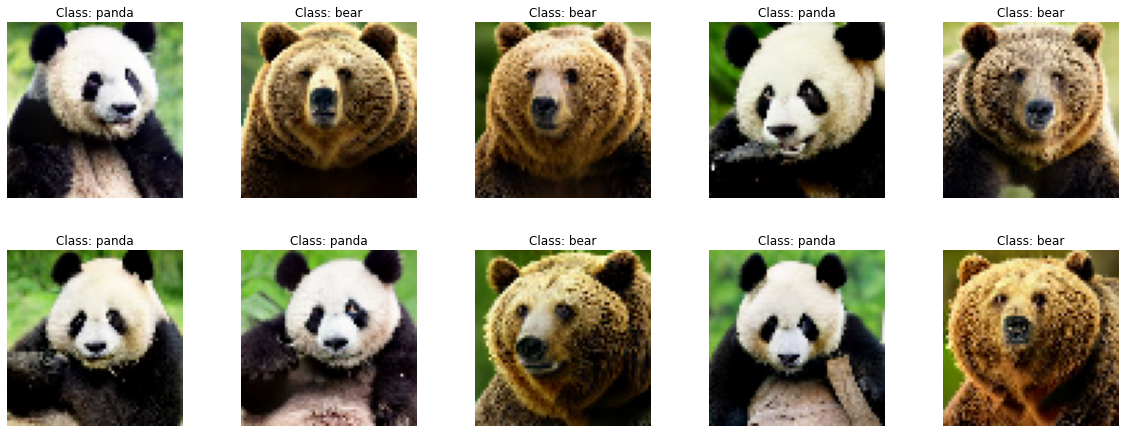

In [138]:
samples = train_generator.__next__()
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {classes[int(target[i])]}")
    plt.axis('off')

# Shallow NN

In [140]:
model = models.Sequential()
  
model.add(layers.Conv2D(32, (3, 3), activation ='relu', input_shape =(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
  
model.add(layers.Conv2D(64, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))
  
model.add(layers.Flatten())
  
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation ="sigmoid"))
  
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 12544)             0         
                                                                 
 dense_14 (Dense)            (None, 512)              

In [141]:
model.compile(loss ="binary_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-4), metrics =['accuracy'])

In [142]:
history = model.fit(train_generator, steps_per_epoch = train_generator.samples// batch_size, validation_data = val_generator, validation_steps = val_generator.samples// batch_size, epochs = 5)

Epoch 1/5
14/14 [==============================] - 5s 293ms/step - loss: 0.5225 - accuracy: 0.7838
Epoch 2/5
14/14 [==============================] - 5s 352ms/step - loss: 0.1946 - accuracy: 0.9752
Epoch 3/5
14/14 [==============================] - 4s 282ms/step - loss: 0.0859 - accuracy: 0.9932
Epoch 4/5
14/14 [==============================] - 4s 281ms/step - loss: 0.0722 - accuracy: 0.9842
Epoch 5/5
14/14 [==============================] - 5s 380ms/step - loss: 0.0456 - accuracy: 0.9955


In [143]:
model.evaluate(train_generator)

15/15 [==============================] - 2s 121ms/step - loss: 0.0246 - accuracy: 0.9979


[0.024560248479247093, 0.9978991746902466]

In [144]:
model.evaluate(test_generator)

4/4 [==============================] - 0s 72ms/step - loss: 0.0183 - accuracy: 1.0000


[0.018268710002303123, 1.0]

# Visualizations

In [145]:
# Pre-processing the image
img = image.load_img('PandasBears/Test/Pandas/251.jpeg', target_size = (64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.

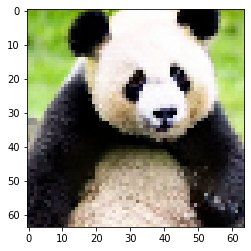

In [147]:
plt.imshow(img_tensor[0])
plt.show()

In [146]:
# Outputs of the 4 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 96ms/step


# 1st Layer O/P

In [148]:
first_layer_activation = activations[0]

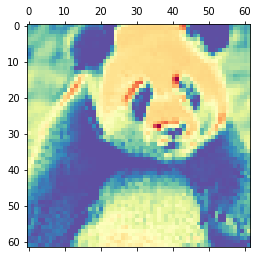

In [155]:
plt.matshow(first_layer_activation[0, :, :, 10], cmap ='Spectral_r')

# 2nd Layer O/P

In [156]:
second_layer_activation = activations[1]

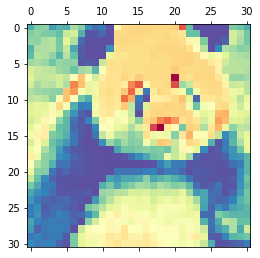

In [157]:
plt.matshow(second_layer_activation[0, :, :, 10], cmap ='Spectral_r')

# 3rd Layer O/P

In [158]:
third_layer_activation = activations[2]

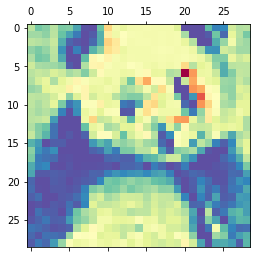

In [159]:
plt.matshow(third_layer_activation[0, :, :, 10], cmap ='Spectral_r')

# 4th Layer O/P

In [160]:
forth_layer_activation = activations[3]

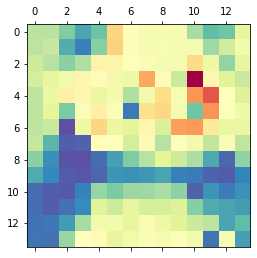

In [161]:
forth_layer_activation = activations[3]
plt.matshow(forth_layer_activation[0, :, :, 10], cmap ='Spectral_r')

# Deep NN

In [162]:
model_d = models.Sequential()
  
model_d.add(layers.Conv2D(32, (3, 3), activation ='relu', input_shape =(64, 64, 3)))
model_d.add(layers.MaxPooling2D((2, 2)))
  
model_d.add(layers.Conv2D(64, (3, 3), activation ='relu'))
model_d.add(layers.MaxPooling2D((2, 2)))
  
model_d.add(layers.Conv2D(128, (3, 3), activation ='relu'))
model_d.add(layers.MaxPooling2D((2, 2)))
  
model_d.add(layers.Conv2D(128, (3, 3), activation ='relu'))
model_d.add(layers.MaxPooling2D((2, 2)))
  
model_d.add(layers.Flatten())
  
model_d.add(layers.Dense(512, activation ='relu'))
model_d.add(layers.Dense(1, activation ="sigmoid"))
  
model_d.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 6, 6, 128)      

In [163]:
model_d.compile(loss ="binary_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-4), metrics =['accuracy'])

In [164]:
history = model_d.fit(train_generator, steps_per_epoch = train_generator.samples// batch_size, validation_data = val_generator, validation_steps = val_generator.samples// batch_size, epochs = 5)

Epoch 1/5
14/14 [==============================] - 6s 387ms/step - loss: 0.6276 - accuracy: 0.6441
Epoch 2/5
14/14 [==============================] - 4s 293ms/step - loss: 0.4580 - accuracy: 0.9099
Epoch 3/5
14/14 [==============================] - 5s 312ms/step - loss: 0.2725 - accuracy: 0.9572
Epoch 4/5
14/14 [==============================] - 4s 281ms/step - loss: 0.1675 - accuracy: 0.9797
Epoch 5/5
14/14 [==============================] - 5s 381ms/step - loss: 0.0778 - accuracy: 0.9977


In [165]:
model_d.evaluate(train_generator)

15/15 [==============================] - 2s 110ms/step - loss: 0.0522 - accuracy: 0.9979


[0.052190255373716354, 0.9978991746902466]

In [166]:
model_d.evaluate(test_generator)

4/4 [==============================] - 0s 71ms/step - loss: 0.0520 - accuracy: 1.0000


[0.05195533111691475, 1.0]

# Visualization

In [167]:
# Pre-processing the image
img = image.load_img('PandasBears/Test/Pandas/251.jpeg', target_size = (64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.

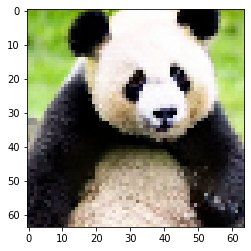

In [168]:
plt.imshow(img_tensor[0])
plt.show()

In [169]:
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model_d.layers[:8]]
activation_model_d = models.Model(inputs = model_d.input, outputs = layer_outputs)
activations_d = activation_model_d.predict(img_tensor)

1/1 [==============================] - 0s 87ms/step


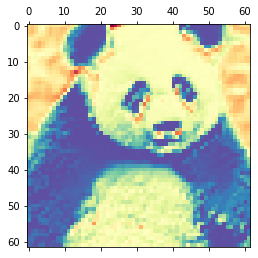

In [174]:
first_layer_activation_d = activations_d[0]
plt.matshow(first_layer_activation_d[0, :, :, 3], cmap ='Spectral_r')

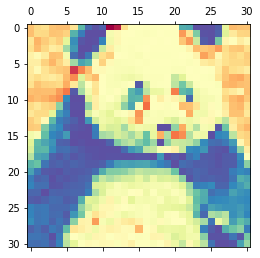

In [175]:
sec_layer_activation_d = activations_d[1]
plt.matshow(sec_layer_activation_d[0, :, :, 3], cmap ='Spectral_r')

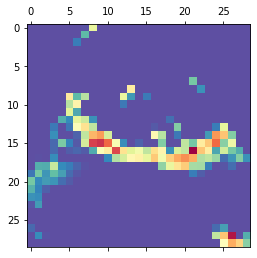

In [176]:
th_layer_activation_d = activations_d[2]
plt.matshow(th_layer_activation_d[0, :, :, 3], cmap ='Spectral_r')

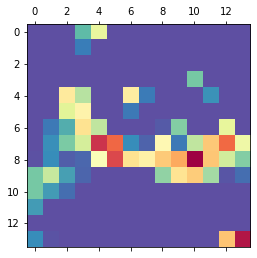

In [177]:
forth_layer_activation_d = activations_d[3]
plt.matshow(forth_layer_activation_d[0, :, :, 3], cmap ='Spectral_r')

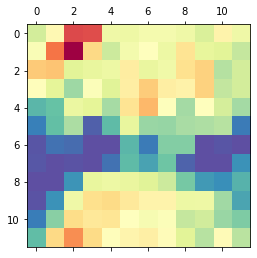

In [178]:
fifth_layer_activation_d = activations_d[4]
plt.matshow(fifth_layer_activation_d[0, :, :, 3], cmap ='Spectral_r')

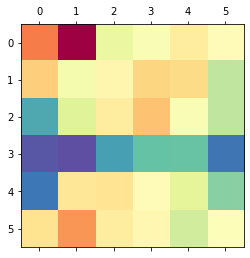

In [179]:
sixth_layer_activation_d = activations_d[5]
plt.matshow(sixth_layer_activation_d[0, :, :, 3], cmap ='Spectral_r')

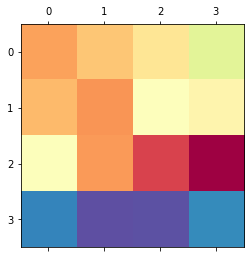

In [180]:
sev_layer_activation_d = activations_d[6]
plt.matshow(sev_layer_activation_d[0, :, :, 3], cmap ='Spectral_r')

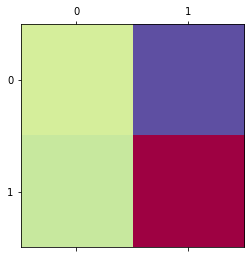

In [181]:
eight_layer_activation_d = activations_d[7]
plt.matshow(eight_layer_activation_d[0, :, :, 3], cmap ='Spectral_r')